In [75]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 

In [84]:
v1 = pd.read_csv("integrated2.csv")
for i in v1.columns:
    print(i)

Unnamed: 0
lat
lon
PSurf1
PSurf10
PSurf11
PSurf12
PSurf13
PSurf14
PSurf15
PSurf16
PSurf17
PSurf18
PSurf19
PSurf2
PSurf20
PSurf21
PSurf22
PSurf23
PSurf24
PSurf25
PSurf26
PSurf27
PSurf28
PSurf29
PSurf3
PSurf30
PSurf31
PSurf32
PSurf33
PSurf34
PSurf35
PSurf36
PSurf37
PSurf38
PSurf39
PSurf4
PSurf40
PSurf41
PSurf42
PSurf43
PSurf44
PSurf45
PSurf46
PSurf47
PSurf48
PSurf49
PSurf5
PSurf50
PSurf51
PSurf52
PSurf6
PSurf7
PSurf8
PSurf9
Qair1
Qair10
Qair11
Qair12
Qair13
Qair14
Qair15
Qair16
Qair17
Qair18
Qair19
Qair2
Qair20
Qair21
Qair22
Qair23
Qair24
Qair25
Qair26
Qair27
Qair28
Qair29
Qair3
Qair30
Qair31
Qair32
Qair33
Qair34
Qair35
Qair36
Qair37
Qair38
Qair39
Qair4
Qair40
Qair41
Qair42
Qair43
Qair44
Qair45
Qair46
Qair47
Qair48
Qair49
Qair5
Qair50
Qair51
Qair52
Qair6
Qair7
Qair8
Qair9
Rainf1
Rainf10
Rainf11
Rainf12
Rainf13
Rainf14
Rainf15
Rainf16
Rainf17
Rainf18
Rainf19
Rainf2
Rainf20
Rainf21
Rainf22
Rainf23
Rainf24
Rainf25
Rainf26
Rainf27
Rainf28
Rainf29
Rainf3
Rainf30
Rainf31
Rainf32
Rainf33
Rainf3

Back to season my friend

In [85]:
# Define the seasonal mapping based on months
seasons = {
    "Winter": [1, 2, 3, 4, 5, 6, 7, 8, 9, 49, 50, 51, 52],
    "Spring": [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
    "Summer": [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
    "Fall": [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
}

# List of variable prefixes to process
variables = ["PSurf", "Qair", "Tair", "Wind", "Rainf"]

# Process each variable group
for var in variables:
    # Dictionary to store seasonal means for the current variable
    seasonal_means = {}
    
    for season, weeks in seasons.items():
        # Select columns for the current variable and season
        season_columns = [f"{var}{week}" for week in weeks]
        
        # Calculate the mean across the selected columns
        seasonal_means[season] = v1[season_columns].mean(axis=1)
        
        # Add the calculated seasonal mean back to the dataset
        v1[f"{var}_{season}"] = seasonal_means[season]
    
    # Drop the original weekly columns for the current variable
    columns_to_drop = [f"{var}{week}" for week in range(1, 53)]
    v1.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrame
print(v1.head)


<bound method NDFrame.head of      Unnamed: 0    lat    lon CNT_FULLNAME  sand % topsoil  sand % subsoil  \
0             0  -8.25  27.25      ALGERIA           51.80           45.83   
1             1  -8.25  27.75      ALGERIA           58.06           49.91   
2             2  -8.25  28.25      ALGERIA           58.06           49.91   
3             3  -8.25  28.75      ALGERIA           52.21           48.32   
4             4  -7.75  27.25      ALGERIA            0.00            0.00   
..          ...    ...    ...          ...             ...             ...   
584         851  10.75  24.25      ALGERIA            0.00            0.00   
585         852  11.25  23.25      ALGERIA           29.45           28.00   
586         853  11.25  23.75      ALGERIA            0.00            0.00   
587         854  11.25  24.25      ALGERIA           49.20           42.40   
588         855  11.75  23.75      ALGERIA           29.45           28.00   

     silt % topsoil  silt% subsoi

In [86]:
v1.columns

Index(['Unnamed: 0', 'lat', 'lon', 'CNT_FULLNAME', 'sand % topsoil',
       'sand % subsoil', 'silt % topsoil', 'silt% subsoil', 'clay % topsoil',
       'clay % subsoil', 'pH water topsoil', 'pH water subsoil',
       'OC % topsoil', 'OC % subsoil', 'N % topsoil', 'N % subsoil',
       'BS % topsoil', 'BS % subsoil', 'CEC topsoil', 'CEC subsoil',
       'CEC clay topsoil', 'CEC Clay subsoil', 'CaCO3 % topsoil',
       'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil', 'C/N topsoil',
       'C/N subsoil', 'geometry', 'PSurf_Winter', 'PSurf_Spring',
       'PSurf_Summer', 'PSurf_Fall', 'Qair_Winter', 'Qair_Spring',
       'Qair_Summer', 'Qair_Fall', 'Tair_Winter', 'Tair_Spring', 'Tair_Summer',
       'Tair_Fall', 'Wind_Winter', 'Wind_Spring', 'Wind_Summer', 'Wind_Fall',
       'Rainf_Winter', 'Rainf_Spring', 'Rainf_Summer', 'Rainf_Fall'],
      dtype='object')

check if there are homegenious data by time series

In [87]:
psurf_columns = [col for col in v1.columns if col.startswith("PSurf")]
print(psurf_columns)
print(len(psurf_columns))

['PSurf_Winter', 'PSurf_Spring', 'PSurf_Summer', 'PSurf_Fall']
4


In [88]:
v1.columns

Index(['Unnamed: 0', 'lat', 'lon', 'CNT_FULLNAME', 'sand % topsoil',
       'sand % subsoil', 'silt % topsoil', 'silt% subsoil', 'clay % topsoil',
       'clay % subsoil', 'pH water topsoil', 'pH water subsoil',
       'OC % topsoil', 'OC % subsoil', 'N % topsoil', 'N % subsoil',
       'BS % topsoil', 'BS % subsoil', 'CEC topsoil', 'CEC subsoil',
       'CEC clay topsoil', 'CEC Clay subsoil', 'CaCO3 % topsoil',
       'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil', 'C/N topsoil',
       'C/N subsoil', 'geometry', 'PSurf_Winter', 'PSurf_Spring',
       'PSurf_Summer', 'PSurf_Fall', 'Qair_Winter', 'Qair_Spring',
       'Qair_Summer', 'Qair_Fall', 'Tair_Winter', 'Tair_Spring', 'Tair_Summer',
       'Tair_Fall', 'Wind_Winter', 'Wind_Spring', 'Wind_Summer', 'Wind_Fall',
       'Rainf_Winter', 'Rainf_Spring', 'Rainf_Summer', 'Rainf_Fall'],
      dtype='object')

In [89]:
v1 = v1.drop(columns=['Unnamed: 0' , "geometry" , "CNT_FULLNAME"])

Since the goal is to build clusters and not extracting information from the dataset  we can remove the high correlated data from the dataframe like subSoil / topSoil correlated data 

In [90]:
v1 = v1.drop(columns=['sand % subsoil','silt% subsoil', 'clay % subsoil', 'pH water subsoil','N % subsoil',
        'BS % subsoil','CEC subsoil', 'CEC Clay subsoil','CaCO3 % subsoil',  'BD subsoil'])

We also drop the correlated top soil chimical components

In [91]:
v1 = v1.drop(columns= ['BS % topsoil','BD topsoil'])

In [92]:
v1

,lat,lon,sand % topsoil,silt % topsoil,clay % topsoil,pH water topsoil,OC % topsoil,OC % subsoil,N % topsoil,CEC topsoil,...,Tair_Summer,Tair_Fall,Wind_Winter,Wind_Spring,Wind_Summer,Wind_Fall,Rainf_Winter,Rainf_Spring,Rainf_Summer,Rainf_Fall
0,-8.25,27.25,51.80,26.09,22.11,7.22,0.583,0.336,0.063,12.58,...,295.897011,297.536962,1.194494,1.868873,2.519690,1.489855,6.228978e-05,3.910529e-05,5.180758e-07,0.000040
1,-8.25,27.75,58.06,22.85,19.09,7.87,0.501,0.288,0.060,9.98,...,294.637157,296.465278,1.416453,2.515895,3.297055,1.825033,6.728652e-05,4.008879e-05,5.186040e-07,0.000041
2,-8.25,28.25,58.06,22.85,19.09,7.87,0.501,0.288,0.060,9.98,...,295.136683,297.200631,1.244746,2.150482,2.911874,1.642836,6.800387e-05,4.033598e-05,2.593020e-07,0.000038
3,-8.25,28.75,52.21,23.23,24.58,7.39,0.678,0.405,0.113,10.87,...,295.205577,297.473670,1.202380,1.877457,2.517810,1.554577,7.036408e-05,4.037359e-05,1.297833e-07,0.000036
4,-7.75,27.25,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.00,...,297.872551,299.033940,1.080200,1.582951,2.453489,1.336165,6.341134e-05,3.849568e-05,9.066328e-07,0.000039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,10.75,24.25,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.00,...,301.055241,300.724349,3.742470,3.273426,2.572916,2.344756,0.000000e+00,5.943346e-07,6.547392e-05,0.000040
585,11.25,23.25,29.45,8.10,12.45,3.55,0.485,0.200,0.065,5.20,...,299.635179,299.085976,3.718296,3.273604,2.367157,2.240640,2.585115e-07,1.873102e-06,7.522470e-05,0.000036
586,11.25,23.75,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.00,...,300.215024,299.688087,3.811351,3.325212,2.476660,2.352260,1.479433e-07,9.231788e-07,7.186731e-05,0.000036
587,11.25,24.25,49.20,26.00,24.80,7.70,0.330,0.230,0.100,8.70,...,301.385689,300.957009,3.874035,3.340192,2.569134,2.378823,0.000000e+00,2.872821e-07,6.524514e-05,0.000033


Normlize the data for better distance calculation

In [38]:
# usin the previous part normalization function 
def MinMax_Normalization(df):
    df_minmax = pd.DataFrame()
    for column in df.columns:
        if df[column].dtype == 'float64' and column not in ["lat","lon"]:
            bas = min(df[column])
            haut = max(df[column])
            gap = haut - bas
            df_minmax[column] = (df[column] - bas)/gap
    return df_minmax

v1 = MinMax_Normalization(v1)
v1

,sand % topsoil,silt % topsoil,clay % topsoil,pH water topsoil,OC % topsoil,OC % subsoil,N % topsoil,CEC topsoil,CEC clay topsoil,CaCO3 % topsoil,...,Tair_Summer,Tair_Fall,Wind_Winter,Wind_Spring,Wind_Summer,Wind_Fall,Rainf_Winter,Rainf_Spring,Rainf_Summer,Rainf_Fall
0,0.539583,0.483148,0.366788,0.749740,0.241808,0.452830,0.217241,0.318642,0.758300,0.162791,...,0.558075,0.623471,0.071960,0.170142,0.340635,0.129061,0.678149,0.301865,0.002549,0.173192
1,0.604792,0.423148,0.316689,0.817238,0.207798,0.388140,0.206897,0.252786,0.767596,0.543530,...,0.472574,0.553259,0.117442,0.277316,0.493966,0.191865,0.732549,0.309513,0.002552,0.179755
2,0.604792,0.423148,0.316689,0.817238,0.207798,0.388140,0.206897,0.252786,0.767596,0.543530,...,0.506474,0.601436,0.082257,0.216788,0.417991,0.157726,0.740358,0.311435,0.000850,0.158891
3,0.543854,0.430185,0.407764,0.767394,0.281211,0.545822,0.389655,0.275329,0.752988,0.254621,...,0.511150,0.619324,0.073576,0.171564,0.340264,0.141189,0.766054,0.311727,0.000000,0.144267
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.692146,0.721546,0.048540,0.122781,0.327577,0.100264,0.690359,0.297124,0.005100,0.165310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.908140,0.832293,0.594069,0.402795,0.351134,0.289248,0.000000,0.002388,0.428955,0.167958
585,0.306771,0.150000,0.206536,0.368640,0.201161,0.269542,0.224138,0.131712,0.365206,0.001491,...,0.811767,0.724955,0.589116,0.402825,0.310549,0.269739,0.002814,0.012332,0.492965,0.140811
586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.851119,0.764402,0.608184,0.411373,0.332148,0.290654,0.001611,0.004945,0.470925,0.145611
587,0.512500,0.481481,0.411413,0.799585,0.136873,0.309973,0.344828,0.220365,0.876494,0.390578,...,0.930567,0.847536,0.621028,0.413854,0.350388,0.295631,0.000000,0.000000,0.427454,0.123729


In [93]:
v1.value_counts()

lat     lon    sand % topsoil  silt % topsoil  clay % topsoil  pH water topsoil  OC % topsoil  OC % subsoil  N % topsoil  CEC topsoil  CEC clay topsoil  CaCO3 % topsoil  C/N topsoil  C/N subsoil  PSurf_Winter  PSurf_Spring  PSurf_Summer  PSurf_Fall    Qair_Winter  Qair_Spring  Qair_Summer  Qair_Fall  Tair_Winter  Tair_Spring  Tair_Summer  Tair_Fall   Wind_Winter  Wind_Spring  Wind_Summer  Wind_Fall  Rainf_Winter  Rainf_Spring  Rainf_Summer  Rainf_Fall
 11.75  23.75  29.450          8.100           12.450          3.550             0.485         0.2000        0.0650       5.200        27.50             0.050            5.50         4.00         92951.533186  92730.787815  93068.112092  92965.597972  0.003849     0.005847     0.019142     0.014016   298.413922   303.407503   300.347243   299.715582  3.658948     3.362700     2.418604     2.337642   1.130904e-07  6.456336e-07  7.104770e-05  0.000032      1
-8.25   27.25  51.800          26.090          22.110          7.220             0.

In [94]:
v1  = v1.drop_duplicates()
v1

,lat,lon,sand % topsoil,silt % topsoil,clay % topsoil,pH water topsoil,OC % topsoil,OC % subsoil,N % topsoil,CEC topsoil,...,Tair_Summer,Tair_Fall,Wind_Winter,Wind_Spring,Wind_Summer,Wind_Fall,Rainf_Winter,Rainf_Spring,Rainf_Summer,Rainf_Fall
0,-8.25,27.25,51.80,26.09,22.11,7.22,0.583,0.336,0.063,12.58,...,295.897011,297.536962,1.194494,1.868873,2.519690,1.489855,6.228978e-05,3.910529e-05,5.180758e-07,0.000040
1,-8.25,27.75,58.06,22.85,19.09,7.87,0.501,0.288,0.060,9.98,...,294.637157,296.465278,1.416453,2.515895,3.297055,1.825033,6.728652e-05,4.008879e-05,5.186040e-07,0.000041
2,-8.25,28.25,58.06,22.85,19.09,7.87,0.501,0.288,0.060,9.98,...,295.136683,297.200631,1.244746,2.150482,2.911874,1.642836,6.800387e-05,4.033598e-05,2.593020e-07,0.000038
3,-8.25,28.75,52.21,23.23,24.58,7.39,0.678,0.405,0.113,10.87,...,295.205577,297.473670,1.202380,1.877457,2.517810,1.554577,7.036408e-05,4.037359e-05,1.297833e-07,0.000036
4,-7.75,27.25,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.00,...,297.872551,299.033940,1.080200,1.582951,2.453489,1.336165,6.341134e-05,3.849568e-05,9.066328e-07,0.000039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,10.75,24.25,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.00,...,301.055241,300.724349,3.742470,3.273426,2.572916,2.344756,0.000000e+00,5.943346e-07,6.547392e-05,0.000040
585,11.25,23.25,29.45,8.10,12.45,3.55,0.485,0.200,0.065,5.20,...,299.635179,299.085976,3.718296,3.273604,2.367157,2.240640,2.585115e-07,1.873102e-06,7.522470e-05,0.000036
586,11.25,23.75,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.00,...,300.215024,299.688087,3.811351,3.325212,2.476660,2.352260,1.479433e-07,9.231788e-07,7.186731e-05,0.000036
587,11.25,24.25,49.20,26.00,24.80,7.70,0.330,0.230,0.100,8.70,...,301.385689,300.957009,3.874035,3.340192,2.569134,2.378823,0.000000e+00,2.872821e-07,6.524514e-05,0.000033


In [95]:
v1.columns

Index(['lat', 'lon', 'sand % topsoil', 'silt % topsoil', 'clay % topsoil',
       'pH water topsoil', 'OC % topsoil', 'OC % subsoil', 'N % topsoil',
       'CEC topsoil', 'CEC clay topsoil', 'CaCO3 % topsoil', 'C/N topsoil',
       'C/N subsoil', 'PSurf_Winter', 'PSurf_Spring', 'PSurf_Summer',
       'PSurf_Fall', 'Qair_Winter', 'Qair_Spring', 'Qair_Summer', 'Qair_Fall',
       'Tair_Winter', 'Tair_Spring', 'Tair_Summer', 'Tair_Fall', 'Wind_Winter',
       'Wind_Spring', 'Wind_Summer', 'Wind_Fall', 'Rainf_Winter',
       'Rainf_Spring', 'Rainf_Summer', 'Rainf_Fall'],
      dtype='object')

Since none of the algorithme we will use is influenced by the presence of outliers we w'ont handle them

# 2. Regression algorithmes coding

# Pre implemented

1. Decision Tree

Scikit learn implementation of regression using Decision tree

Mean Squared Error: 7.577185169703775e-07
R² Score: 0.9593094076361899
Mean Absolute error: 0.0006105089832010233
Root mean squared error: 0.0008704702849439362


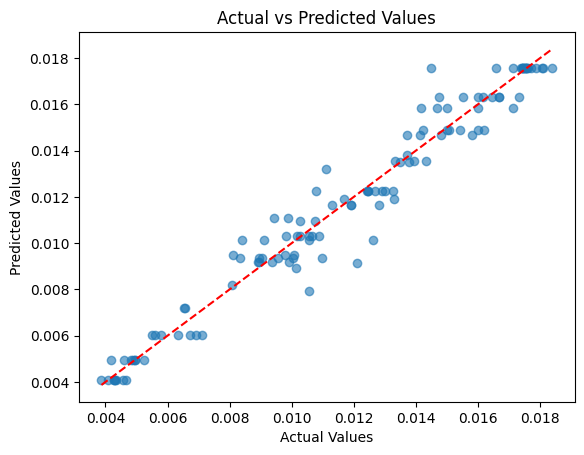

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Importing our dataset
target = "Qair_Winter"
data = v1

columns = [col for col in v1.columns if col != target]
X, y = data[columns], data[target]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("R² Score:", r2)
print(f"Mean Absolute error: {mae}")
print(f"Root mean squared error: {rmse}")

# Visualize predictions
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


Reasons why SICKIT-Learn algorithm is better and much faster:
- I used loops while they use optimized vectorization
- I used dataframes whil they used more optimized data structures such as numpy arrays 
- They used lower level implementation, Since I worked withpure Python, they implemented it using Cython instead.
- My approch is sequential, meanwhile their's is based of threads, which exploits multiple cores in CPU and ensures parallelism

2. Random forest

SCIKIT-Learn implementation of random forest

In [97]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Example: Loading your dataset (replace with your dataset)
# df = pd.read_csv('your_data.csv')

# Assume 'target' is the column you're predicting
target = 'Qair_Winter'  # Replace with your target column name
features = [col for col in v1.columns if col != target]

# Splitting data into features (X) and target (y)
X = v1[features]  # Features
y = v1[target]    # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute error: {mae}")
print(f"Root mean squared error: {rmse}")


Mean Squared Error: 1.6546939072363912e-07
R² Score: 0.9911140517542785
Mean Absolute error: 0.0002810950651408152
Root mean squared error: 0.0004067792899394451


# Hard Coded



Optimized Decision Tree

In [98]:
import numpy as np
import pandas as pd

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

def calculate_mse(data, target):
    return ((data[target] - data[target].mean()) ** 2).mean()

def features_2_dict(df):
    return {feature: df.columns.get_loc(feature) for feature in df.columns}

def end_criterion(df, depth, max_depth):
    return len(df) < 2 or depth >= max_depth or len(df.columns) <= 1

def find_best_feature_and_threshold(df, target):
    best_feature = None
    best_threshold = None
    best_score = float("inf")


    features = [col for col in df.columns if col not in ["Qair_Winter", "Qair_Spring", "Qair_Summer", "Qair_Fall"]]
    #print(f"looking for best feature among these: {features}")

    for feature in features:
        thresholds = df[feature].unique()
        thresholds.sort()

        for i in range(0, len(thresholds)-1):
            #threshold = (thresholds[i] + thresholds[i - 1]) / 2
            threshold = thresholds[i]

            left_data = df[df[feature] <= threshold]
            right_data = df[df[feature] > threshold]
            #print(f"\n left : {len(left_data)} \n write : {len(right_data)}")

            if len(left_data) == 0 or len(right_data) == 0:
                #print(f" skip this feature: {feature}")
                continue

            mse_left = calculate_mse(left_data, target)
            mse_right = calculate_mse(right_data, target)
            score = (len(left_data) * mse_left + len(right_data) * mse_right) / len(df)

            if score < best_score:
                best_feature = feature
                best_threshold = threshold
                best_score = score
                #print(" Best So far updated!")
    
    #print(f"\n\n Result: best feature: {best_feature} , best threshold: {best_threshold}\n Results comin from {len(df)} instances, and score of {best_score}\nResearch is done for this node\n")
    return best_feature, best_threshold, best_score

def split(df, feature, threshold):
    left_df = df[df[feature] <= threshold]
    right_df = df[df[feature] > threshold]
    return left_df, right_df

def leaf_value(df, target):
    #print("created leaf")
    return df[target].mean()

def build_tree(df, target='Qair_Winter', depth=0, max_depth=200, min_impurity=2):
    if end_criterion(df, depth, max_depth):
        return Node(value=leaf_value(df, target))

    impurity = calculate_mse(df, target)
    best_feature, best_threshold, weighted_impurity = find_best_feature_and_threshold(df, target)

    if (weighted_impurity / impurity) * 100 < min_impurity:
        return Node(value=leaf_value(df, target))
    
    #print(f"splitting on feature: {best_feature} with threshold = {best_threshold}")
    left_son, right_son = split(df, best_feature, best_threshold)
    #print("affecting sons ...")
    return Node(
        feature=best_feature,
        threshold=best_threshold,
        left=build_tree(left_son, target, depth + 1, max_depth, min_impurity),
        right=build_tree(right_son, target, depth + 1, max_depth, min_impurity),
    )

def predict(root, line, features_indexes_dict):
    if root.left is None and root.right is None:
        return root.value

    feature_index = features_indexes_dict[root.feature]
    if line[feature_index] < root.threshold:
        return predict(root.left, line, features_indexes_dict)
    else:
        return predict(root.right, line, features_indexes_dict)

def fit(df, test_data_percent=20, target='Qair_Winter', max_depth=5, min_impurity=2):
    len_test = int(len(df) * test_data_percent / 100)
    train_data = df.iloc[:-len_test]
    test_data = df.iloc[-len_test:]
    #print("creating root")
    root = build_tree(train_data, target, max_depth=max_depth, min_impurity=min_impurity)

    features_indexes = features_2_dict(df)
    predicted = [predict(root, line, features_indexes) for _, line in test_data.iterrows()]

    predicted = pd.Series(predicted, index=test_data.index)
    mse = ((test_data[target] - predicted) ** 2).mean()
    r_square = r2_score(test_data[target], predicted)
    mae = mean_absolute_error(test_data[target], predicted)
    rmse = root_mean_squared_error(test_data[target], predicted)

    return root, mse, r_square, mae, rmse

def r2_score(y_true, y_pred):
    ss_res = ((y_true - y_pred) ** 2).sum()
    ss_tot = ((y_true - y_true.mean()) ** 2).sum()
    return 1 - (ss_res / ss_tot)

def mean_absolute_error(y_true, y_pred):
    return abs(y_true - y_pred).mean()

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).mean())




Decision tree with threads

In [99]:
len(v1.columns)

34

Optimized Random Forest

In [100]:
import numpy as np
import pandas as pd


def create_sample(df, max_features, target = 'Qair_Winter', bootstrap_percent = 60):
    """
    Create a random sample of the dataframe with specified features and bootstrap percentage.
    """
    sampled_features = np.random.choice(df.columns.difference([target]), max_features, replace=False)  # Exclude target
    sampled_df = df[list(sampled_features) + [target]].sample(
        frac=bootstrap_percent / 100, replace=True, random_state=None
    )
    return sampled_df

def Random_forest(df, nbr_trees=10, max_features= 20, bootstrap_percent=60,
                  test_data_percent=20, target='Qair_Winter', max_depth=5, min_impurity=2):
    """
    Build a random forest by training multiple decision trees on bootstrapped samples of the data.
    """
    forest = []
    errors = []

    for i in range(nbr_trees):
        # Create random sampling
        df_sample = create_sample(df, max_features, target, bootstrap_percent)
        #print(f"Sample created with features: {len(df_sample.columns) - 1} // rows: {len(df_sample)}")

        # Train a decision tree
        tree, mse, _, _, _ = fit(df, test_data_percent, target, max_depth=max_depth, min_impurity=min_impurity)
        #print(f"\n\nTree {i+1} successfully created, mse = {mse:.4f}\n\n")

        # Store the tree and its error
        forest.append(tree)
        errors.append(mse)

    print("Forest complete!")
    return forest, errors

def RF_predict(forest, line, features_indexes):
    """
    Predict the output for a single line using the Random Forest ensemble.
    """
    predictions = np.array([predict(tree, line, features_indexes) for tree in forest])
    return predictions.mean()

def train_test_sets(df, test_data_percent):
    """
    Split the data into train and test sets based on the specified percentage.
    """
    len_test = int(len(df) * test_data_percent / 100)
    train_data = df[:-len_test]
    test_data = df[-len_test:]
    return train_data, test_data

def evaluate_rf(forest, df, target, test_data_percent=20):
    """
    Evaluate the Random Forest model on the test data.
    """
    # Split data
    _, test_data = train_test_sets(df, test_data_percent)

    # Generate feature indexes
    features_indexes = features_2_dict(df)

    # Predict values for test data
    predicted = np.array([RF_predict(forest, line, features_indexes) for _, line in test_data.iterrows()])

    # Actual target values
    y_true = test_data[target].values

    # Calculate metrics
    mse = np.mean((y_true - predicted) ** 2)
    r2 = 1 - mse / np.var(y_true)
    # Calculate MAE
    mae_np = np.abs(y_true - predicted)
    mae = np.mean(mae_np)
    # Calculate RMSE
    rmse = np.sqrt(mse)
    return mse, r2, mae, rmse



# Run DT

In [101]:
# Example Usage:
root, mse, r_square, mae, rmse = fit(v1, 20, 'Qair_Winter', max_depth=10)
print(f"MSE: {mse}, R^2: {r_square}, MAE: {mae}, RMSE: {rmse}")

MSE: 2.361868924730891e-06, R^2: 0.5999585109645584, MAE: 0.0013364270314570783, RMSE: 0.0015368373123824431


C:\Users\wahee\AppData\Local\Temp\ipykernel_28144\285856726.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if line[feature_index] < root.threshold:


# Run RF

In [74]:
# Main code
forest, mse_list = Random_forest(v1, nbr_trees=10, max_features=20, bootstrap_percent=80,
                                  test_data_percent=30, target='Qair_Winter', max_depth=10, min_impurity=2)

print("\n~~~~~~~~~~ Evaluation Part ~~~~~~~~~~\n")
print(f"Mean of MSE values of all trees: {np.mean(mse_list):.4f}\n")

mse, r2, mae, rmse = evaluate_rf(forest, v1, target='Qair_Winter', test_data_percent=20)
print(f"Overall Random Forest Evaluation:\nMSE: {mse}\n R^2: {r2}\n MAE: {mae}\n RMSE: {rmse}")

# Single Prediction Test
print("\n~~~~~~~~~~ Prediction Test ~~~~~~~~~~\n")
line_as_df = v1.sample(1)
print(line_as_df.columns)
line = line_as_df.iloc[0]
my_dict = features_2_dict(v1)
prediction = RF_predict(forest, line, my_dict)

print(f"Prediction: {prediction:.4f}\nActual: {line_as_df['Qair_Winter'].values[0]:.4f}\n")


C:\Users\wahee\AppData\Local\Temp\ipykernel_28144\285856726.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if line[feature_index] < root.threshold:
C:\Users\wahee\AppData\Local\Temp\ipykernel_28144\285856726.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if line[feature_index] < root.threshold:
C:\Users\wahee\AppData\Local\Temp\ipykernel_28144\285856726.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if line[feature

Forest complete!

~~~~~~~~~~ Evaluation Part ~~~~~~~~~~

Mean of MSE values of all trees: 0.0467

Overall Random Forest Evaluation:
MSE: 0.06399235229454374
 R^2: -1.3054899386676166
 MAE: 0.2283412003139937
 RMSE: 0.2529670972568246

~~~~~~~~~~ Prediction Test ~~~~~~~~~~

Index(['sand % topsoil', 'silt % topsoil', 'clay % topsoil',
       'pH water topsoil', 'OC % topsoil', 'OC % subsoil', 'N % topsoil',
       'CEC topsoil', 'CEC clay topsoil', 'CaCO3 % topsoil', 'C/N topsoil',
       'C/N subsoil', 'PSurf_Winter', 'PSurf_Spring', 'PSurf_Summer',
       'PSurf_Fall', 'Qair_Winter', 'Qair_Spring', 'Qair_Summer', 'Qair_Fall',
       'Tair_Winter', 'Tair_Spring', 'Tair_Summer', 'Tair_Fall', 'Wind_Winter',
       'Wind_Spring', 'Wind_Summer', 'Wind_Fall', 'Rainf_Winter',
       'Rainf_Spring', 'Rainf_Summer', 'Rainf_Fall'],
      dtype='object')
Prediction: 0.4127
Actual: 0.2477

